In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data=pd.read_csv('Home_prices.csv')

In [6]:
data

,Area,Price
0,2600,550000
1,"3,000",565000
2,"3,200",610000
3,"3,600",680000
4,"4,000",725000


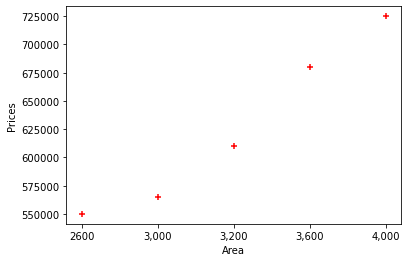

In [10]:
plt.xlabel('Area')
plt.ylabel('Prices')
plt.scatter(data.Area,data.Price, c='r',marker='+')

In [22]:
data.dtypes

Area     object
Price     int64
dtype: object

In [28]:
data['Area']=data['Area'].astype(str)

In [31]:
data['Area']=data['Area'].str.replace(',', '')

In [32]:
data

,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [33]:
data['Area']=data.Area.astype(float)

In [39]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(data[['Area']],data.Price)

LinearRegression()

In [35]:
reg.coef_

array([135.78767123])

In [36]:
reg.intercept_

180616.43835616432

In [41]:
reg.predict([[3300,1000,1500]])

array([628715.75342466])

### Working with Canadian dataset

In [51]:
cn_data=pd.read_excel('Canada.xlsx')

In [52]:
cn_data

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [53]:
cn_data.columns=['year','income']

In [54]:
cn_data

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [55]:
cn_data.dtypes

year        int64
income    float64
dtype: object

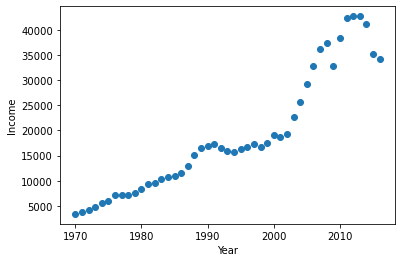

In [56]:
plt.xlabel('Year')
plt.ylabel('Income')
plt.scatter(cn_data.year,cn_data.income)

In [140]:
X = cn_data.iloc[:,:1]
y = cn_data.iloc[:,1:]

In [141]:
X.shape,y.shape

((47, 1), (47, 1))

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [143]:
X_train.shape

(37, 1)

In [144]:
y_train.shape ,cn_data.year.shape,cn_data.income.shape

((37, 1), (47,), (47,))

In [145]:
model=LinearRegression()

In [147]:
model.fit(X_train,y_train)

LinearRegression()

In [148]:
X_test.shape,y_test.shape

((10, 1), (10, 1))

In [150]:
pred=model.predict(X_test)

In [113]:
pred

array([[ 3399.299037, 18601.39724 , 18987.38241 ,  5998.144346,
         9434.390652, 25719.14715 ,  3768.297935, 42334.71121 ,
        17266.09769 ,  4251.175484, 29198.05569 , 15875.58673 ,
        36144.48122 ,  8355.96812 , 16412.08309 , 15080.28345 ,
        34229.19363 , 16838.6732  ,  7100.12617 , 42665.25597 ,
        10790.32872 , 16622.67187 , 37446.48609 ]])

In [153]:
model.score(y_test,pred)

-3618593.2767973957

In [154]:
from sklearn.metrics import r2_score

In [156]:
accuracy=r2_score(y_test,pred)

In [157]:
accuracy

0.8751771396846304

In [162]:
model.predict([[2020]])

array([[41027.67748165]])